In [0]:
import numpy as np
import pandas as pd

In this activity we will apply PCA to a dataset of health data. However, first we will try and implement PCA from scratch!

In [0]:
np.random.seed(234) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

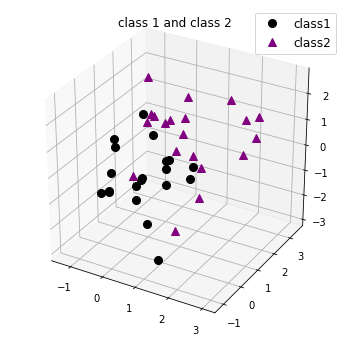

In [3]:
# visualize class 1 and class 2 onto 3D plot
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 12   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='black', alpha=1, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=1, color='purple', label='class2')

plt.title('class 1 and class 2')
ax.legend(loc='upper right')

plt.show()



# merge the dataset and ignore the class labels
total_samples = np.concatenate((class1_sample, class2_sample), axis=1)


# compute mean of x,y,z dimenstion and create a vector
mean_x = np.mean(total_samples[0,:])
mean_y = np.mean(total_samples[1,:])
mean_z = np.mean(total_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])




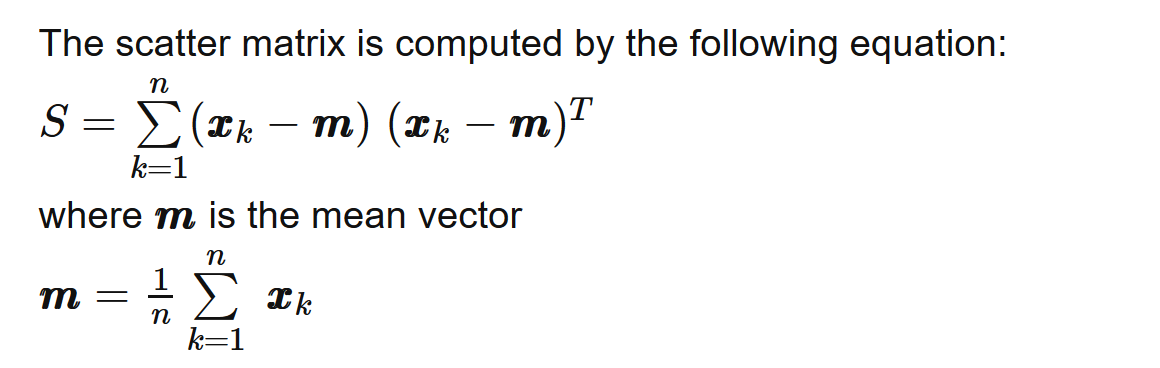

In [4]:
# Next, let's compute the scatter matrix of our data (see image above)
scr_matrix = np.zeros((3,3))

print(total_samples.shape[1])
for i in range(total_samples.shape[1]):
    scr_matrix += (total_samples[:,i].reshape(3,1) - mean_vector).dot((total_samples[:,i].reshape(3,1) - mean_vector).T)


# Print the scatter matrix
print('Scatter Matrix:\n', scr_matrix)

# We can also compute PCA with the covariance matrix (np.cov)
cov_mat = np.cov([total_samples[0,:],total_samples[1,:],total_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)


40
Scatter Matrix:
 [[39.35126181  4.22467775 12.74899364]
 [ 4.22467775 50.9168567  10.18400644]
 [12.74899364 10.18400644 66.86899978]]
Covariance Matrix:
 [[1.00900671 0.10832507 0.32689727]
 [0.10832507 1.30556043 0.26112837]
 [0.32689727 0.26112837 1.71458974]]


**How do the covariance matrix and scatter matrix differ? You can wait until the end to answer this.**

From the below calculation of Scaling factor it can be observed that covarience matrix is 39 times the Scatter matrix. Here Scaling factor is 39.



In [5]:
# Let's compute the eigenvectors and eigen values

# Take the scatter matrix and compute the eigenvectors and eigenvalues (np.linalg.eig)
eigen_val_sc, eigen_vec_sc = np.linalg.eig(scr_matrix)

# Similarly, apply the same function to the covariance matrix
eigen_val_cov, eigen_vec_cov = np.linalg.eig(cov_mat)

# Print out all of the eigenvectors and eigenvalues (for both scatter matrix & covariance matrix)
for i in range(len(eigen_val_sc)):
    eigvec_sc = eigen_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eigen_vec_cov[:,i].reshape(1,3).T
   

    print('Eigen Vector : \n{}'.format(i+1, eigvec_sc))
    print('Eigen value  from scatter matrix: {}'.format(i+1, eigen_val_sc[i]))
    print('Eigen value  from covariance matrix: {}'.format(i+1, eigen_val_cov[i]))
    print('Scaling factor: ', eigen_val_sc[i]/eigen_val_cov[i])
    print('\n\n')



Eigen Vector : 
1
Eigen value  from scatter matrix: 1
Eigen value  from covariance matrix: 1
Scaling factor:  39.0



Eigen Vector : 
2
Eigen value  from scatter matrix: 2
Eigen value  from covariance matrix: 2
Scaling factor:  38.99999999999999



Eigen Vector : 
3
Eigen value  from scatter matrix: 3
Eigen value  from covariance matrix: 3
Scaling factor:  39.0





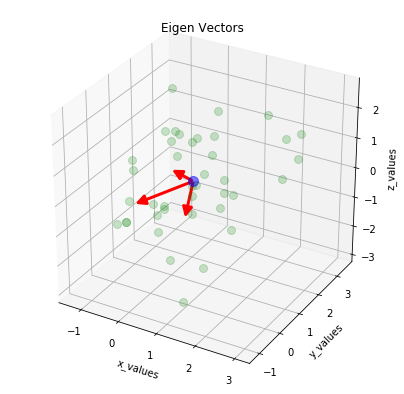

In [6]:
# Let's visualize the data now
# Visualize all of the original points together with the eigenvectors
#
# Visualize the eigenvectors
# You can either use altair or matplotlib (code below)
#  
#     a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")


from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)




fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(total_samples[0,:], total_samples[1,:], total_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='blue', alpha=0.5)
for v in eigen_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigen Vectors')

plt.show()



76.59928002932904
46.18868656007503
34.34915169429428
Matrix W:
 [[ 0.33730459  0.12837844]
 [ 0.39443594 -0.91878091]
 [ 0.85477828  0.37331034]]


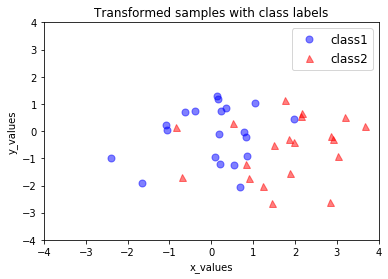

In [7]:
# Projecting data

# Sort the eigenvectors by descreasing eigenvalues
# You can start with the code below
# Make a list of (eigenvalue, eigenvector) tuples
# eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]
eig_pairs = [(np.abs(eigen_val_sc[i]), eigen_vec_sc[:,i]) for i in range(len(eigen_val_sc))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)


for i in eig_pairs:
    print(i[0])


matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

# Finally, we will project our data onto 2D plane
# transformed = matrix_w.T.dot(all_samples)
transformed = matrix_w.T.dot(total_samples)


# Visualize the transformed data and add the labels (class_1 and class_2)
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

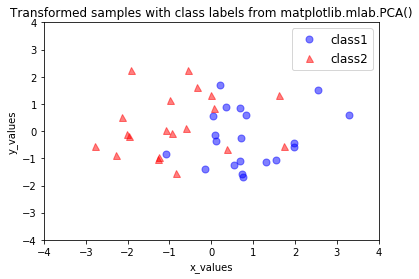

In [8]:

# from sklearn.decomposition import PCA as sklearnPCA

# sklearn_pca = sklearnPCA(n_components=2)
# sklearn_transf = sklearn_pca.fit_transform(all_samples.T)
# visualize the results

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(total_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()



In [0]:
# Finally, I added some data in the activity. Read it and try projecting the data and
import numpy as np
import pandas as pd
import altair as alt

In [10]:
DATA_LOCATION='/content/demographic.csv'
df = pd.read_csv(DATA_LOCATION, encoding = "ISO-8859-1")
df1 = pd.read_csv(DATA_LOCATION, encoding = "ISO-8859-1")
df = df.fillna(0)
df.head()
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
count,10175.000000,10175.0,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000
mean,78644.000000,8.0,1.964423,1.508305,31.484128,0.684029,3.091892,3.289828,1.454840,44.501916,1.177789,0.079705,1.227027,1.097101,1.657199,1.697592,1.995086,1.458182,0.260147,1.105651,1.630565,1.966388,1.050713,1.974939,1.945651,0.758526,1.432531,1.413170,0.682555,3.874693,3.730418,0.542899,1.008354,0.396560,1.499951,45.957740,1.352531,3.401179,2.702015,1.896806,30585.180933,30585.180933,1.484128,110.926880,10.742703,10.378968,2.078400
std,2937.413829,0.0,0.185243,0.499956,24.421651,3.120620,1.263305,1.613241,0.564931,69.414730,0.958413,0.362694,1.830533,0.341723,8.361784,4.128257,1.976462,2.352551,0.688470,0.307406,0.482879,0.180237,0.268201,0.219595,0.274201,0.513021,0.899043,0.897271,0.595397,1.722184,1.775085,0.814831,1.193006,0.704731,0.500025,15.635581,2.647580,1.365358,5.894363,2.042589,26948.427403,27941.005388,0.499773,4.260322,13.843172,13.608864,1.681621
min,73557.000000,8.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,3697.772098,0.000000,1.000000,104.000000,0.000000,0.000000,0.000000
25%,76100.500000,8.0,2.000000,1.000000,10.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,34.000000,1.000000,3.000000,1.000000,0.000000,12754.485277,12561.598665,1.000000,107.000000,5.000000,5.000000,0.720000
50%,78644.000000,8.0,2.000000,2.000000,26.000000,0.000000,3.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000,4.000000,0.000000,1.000000,0.000000,1.000000,43.000000,1.000000,4.000000,1.000000,1.000000,20232.999616,20174.573544,1.000000,111.000000,7.000000,7.000000,1.520000
75%,81187.500000,8.0,2.000000,2.000000,52.000000,0.000000,4.000000,4.000000,2.000000,79.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,5.000000,5.000000,1.000000,2.000000,1.000000,2.000000,56.000000,2.000000,4.000000,4.000000,4.000000,36280.427224,36748.217798,2.000000,115.000000,14.000000,14.000000,3.400000
max,83731.000000,8.0,2.000000,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,7.000000,9.000000,99.000000,9.000000,99.000000,99.000000,9.000000,99.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,7.000000,7.000000,3.000000,4.000000,3.000000,2.000000,80.000000,77.00000

In [11]:
df.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
       'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ',
       'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object')

In [12]:
df.shape

(10175, 47)

In [0]:
df = df.fillna(0)

Choosing the column RIDSTATR values as class labels as this column contains only 2 values

In [14]:
# df['SDMVPSU'].unique()
# y_final=df['SDMVPSU']



print(df['RIDSTATR'].unique())
y_final=df['RIDSTATR']

[2 1]


In [0]:
# df = df.drop(columns=['SDMVPSU'],axis=1)
df = df.drop(columns=['RIDSTATR'],axis=1)


In [0]:
from sklearn import preprocessing 

df = preprocessing.scale(df)


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1','principal component 2'])
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

In [18]:
principalDf.head()

,principal component 1,principal component 2
0,2.672777,-0.646624
1,1.371225,0.653770
2,3.581293,-1.594656
3,-1.128590,1.187236
4,4.036322,-1.714221


In [19]:
yRand = np.array(np.random.rand(4500)*10)
yRand = pd.DataFrame(data = yRand,columns=['yRand'])
finalDf = pd.concat([principalDf,yRand, y_final ], axis = 1)
finalDf

,principal component 1,principal component 2,yRand,RIDSTATR
0,2.672777,-0.646624,9.099622,2
1,1.371225,0.653770,3.622818,2
2,3.581293,-1.594656,7.687276,2
3,-1.128590,1.187236,6.689403,2
4,4.036322,-1.714221,8.348463,2
...,...,...,...,...
10170,1.290190,1.492570,NaN,2
10171,-4.278952,-2.100994,NaN,2
10172,1.271822,-3.466469,NaN,2
10173,-3.539308,-1.400683,NaN,2


In [26]:


alt.Chart(finalDf.head(4500)).mark_point().encode(
    x='principal component 1',
    # y='yRand',
    y='principal component 2',
    # color = 'SDMVPSU',
    color = 'RIDSTATR'
    
   
    
)

alt.Chart(...)

**Choosing another column-RIDRETH1 as class label and visulizing the labels **

In [21]:
df1

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,8,2,1,26,NaN,2,2,2.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,5.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5,5,0,0,0,2,19,1.0,3.0,NaN,NaN,27141.631824,28115.568221,1,104,77.0,77.0,NaN
10171,83728,8,2,2,2,24.0,1,1,2.0,24.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4,4,1,1,0,1,40,1.0,3.0,1.0,3.0,15274.475360,16512.138781,1,107,8.0,8.0,1.95
10172,83729,8,2,2,42,NaN,4,4,2.0,NaN,2.0,NaN,2,1.0,6.0,NaN,5.0,3.0,2.0,1,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1,1,0,0,0,2,42,2.0,5.0,3.0,NaN,24122.248900,26902.344381,1,104,7.0,7.0,3.66
10173,83730,8,2,1,7,NaN,2,2,1.0,84.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4,4,1,1,0,2,30,2.0,4.0,1.0,3.0,25521.878546,26686.025573,2,109,6.0,6.0,1.05


Preprocessing the data and
Choosing the column RIDRETH1 values as class labels as this column contains only 5 values

In [0]:
y_final_1=df1['RIDRETH1']
df1 = df1.fillna(0)
df1 = df1.drop(columns=['RIDRETH1'],axis=1)
df1 = preprocessing.scale(df1)

In [23]:


pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])
finalDf_1 = pd.concat([principalDf,yRand, y_final_1 ], axis = 1)
finalDf_1

alt.Chart(finalDf_1.head(4500)).mark_point().encode(
    x='principal component 1',
    y='RIDRETH1',
    
    color = 'RIDRETH1'
    
   
    
)

alt.Chart(...)